# Logistic Regression


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Data

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [3]:
df = pd.read_csv('../data/hearing_test.csv')

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

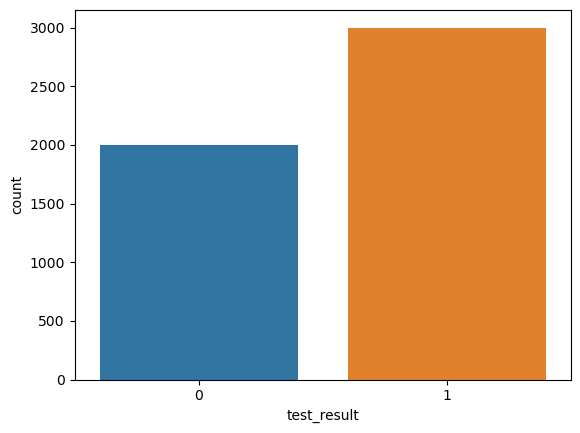

In [9]:
sns.countplot(data=df, x='test_result')

In [10]:
# Distribution of the features per category

<Axes: xlabel='test_result', ylabel='age'>

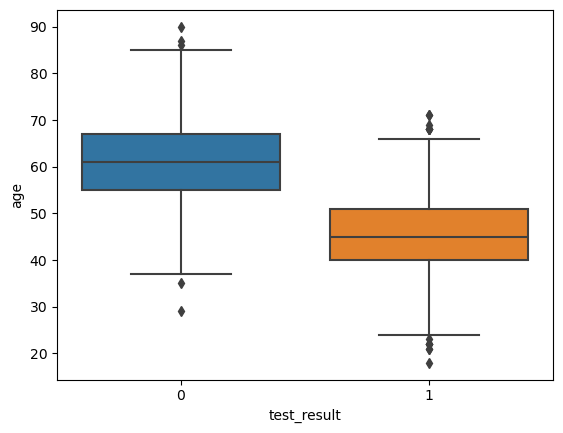

In [18]:
sns.boxplot(data=df, x='test_result', y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

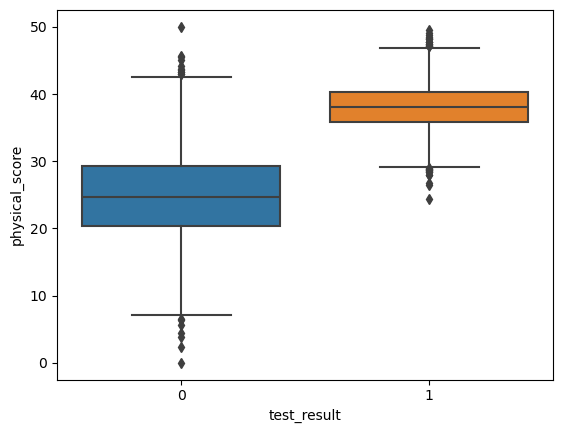

In [21]:
sns.boxplot(data=df, x='test_result', y='physical_score')

In [19]:
df.groupby(by='test_result').describe()

age                                                     \
              count       mean       std   min   25%   50%   75%   max   
test_result                                                              
0            2000.0  61.052000  8.613791  29.0  55.0  61.0  67.0  90.0   
1            3000.0  45.313667  7.986731  18.0  40.0  45.0  51.0  71.0   

            physical_score                                                     
                     count       mean       std   min   25%   50%   75%   max  
test_result                                                                    
0                   2000.0  24.829200  6.712330  -0.0  20.3  24.6  29.3  50.0  
1                   3000.0  38.047633  3.363272  24.3  35.8  38.1  40.3  49.5

<Axes: xlabel='age', ylabel='physical_score'>

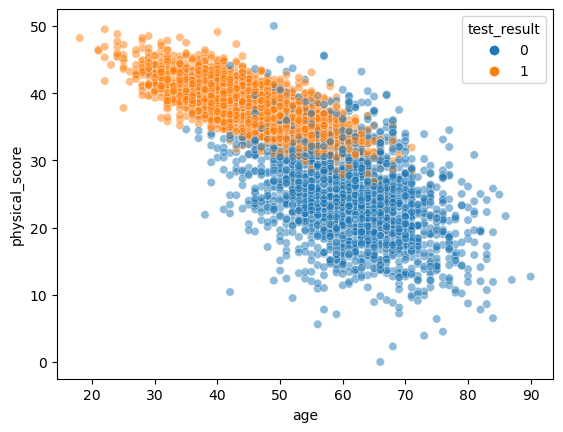

In [26]:
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

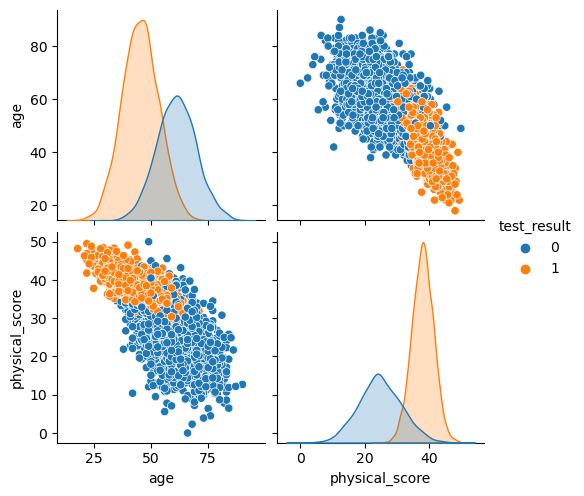

In [27]:
sns.pairplot(df, hue='test_result')

In [28]:
# Heatmap of how correlated the features are

<Axes: >

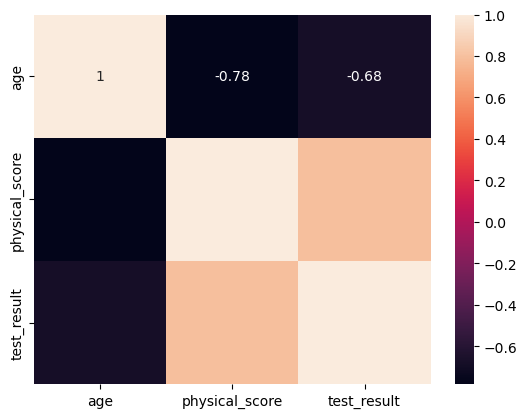

In [29]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

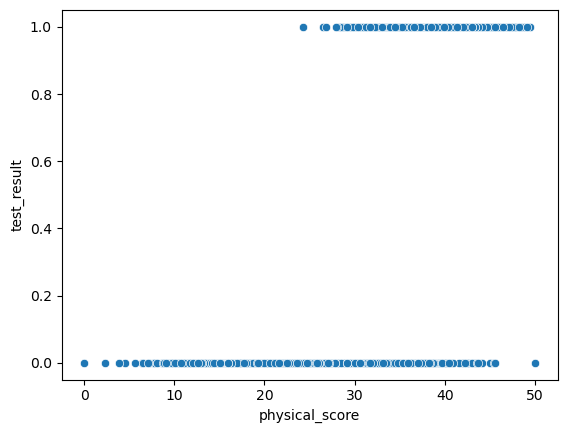

In [58]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

<Axes: xlabel='age', ylabel='test_result'>

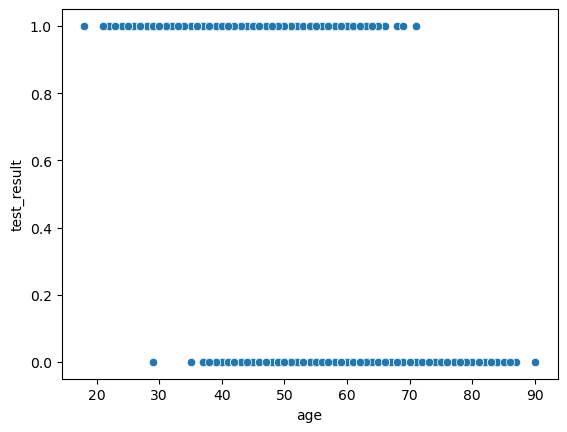

In [59]:
sns.scatterplot(data=df, x='age', y='test_result')

Easily discover new plot types with a google search! Searching for "3d matplotlib scatter plot" quickly takes you to: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

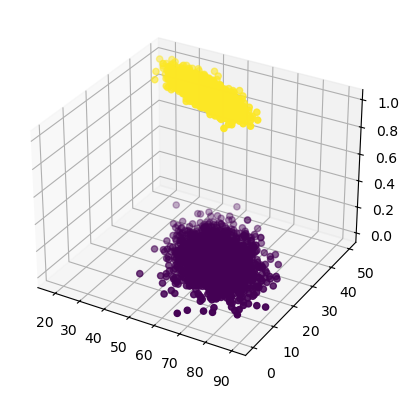

In [60]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

### Train | Test Split and Scaling

In [30]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [31]:
# It is a good idea to scale features, escpecially if you want to compare coefficients directly to each other.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [34]:
scaler = StandardScaler()

In [35]:
scaled_X_train = scaler.fit_transform(X_train)

In [36]:
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model = LogisticRegression()

In [39]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

### Coefficient Interpretation

Things to remember:

* These coefficients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data.
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta_{1}$$

The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

In [40]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

### Model perfomance on Classification Tasks

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
y_pred = log_model.predict(scaled_X_test)

In [42]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [46]:
accuracy_score(y_test, y_pred)

0.93

In [47]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [62]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [63]:
y_train.iloc[0]

1

In [64]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [65]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1])

In [51]:
from sklearn.metrics import precision_score, recall_score

In [52]:
precision_score(y_test, y_pred)

0.9331210191082803

In [53]:
recall_score(y_test, y_pred)

0.9543973941368078

In [55]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [57]:
y_test[0]

1

## Evaluating Curves and AUC

In [66]:
# import plot_precision_recall_curve, plot_precision_roc_curve

---